<a href="https://colab.research.google.com/github/shamim237/Vegetable-Leaf-Classification/blob/main/LEAF_CNN_(img_pro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import os
import cv2
from PIL import Image
import glob
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.models import Model, load_model, Sequential
from tensorflow.keras import regularizers


from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Dropout, ReLU,Activation, MaxPool2D, BatchNormalization, Flatten, Conv2D,GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

In [ ]:
size = 128

num_classes= 4

In [ ]:
# Leave it as comment, you don't have to run this

# train_images = []
# train_labels = [] 

# # define the path of the dataset using glob function
# for directory_path in glob.glob("/content/drive/MyDrive/LEAF_DATASET(EQUAL)/LEAF_DATASET(EQUAL)/train/*"):
#     label = directory_path.split("/")[-1]
#     print(label)
#     for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         print(img_path)
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
#         img = cv2.resize(img, (size, size ))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#         img = cv2.Canny(img, 10, 200)
#         train_images.append(img) # make lists the training images
#         train_labels.append(label) #make list the training labels

# #Convert lists to arrays        
# train_images = np.array(train_images)
# train_labels = np.array(train_labels)

In [ ]:
# test_images = []
# test_labels = [] 

# for directory_path in glob.glob("/content/drive/MyDrive/LEAF_DATASET(EQUAL)/LEAF_DATASET(EQUAL)/validation/*"):
#     im_label = directory_path.split("/")[-1]
#     for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (size, size))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#         img = cv2.Canny(img, 10, 200)
#         #train_images.append(img)
#         test_images.append(img)
#         test_labels.append(im_label)
#         print(img_path)

# #Convert lists to arrays                
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)

In [ ]:
# import pickle

# pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_data_train(canny).pickle', 'wb')
# pickle.dump(train_images, pick_in)
# pick_in.close()

# pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_train_labels(canny).pickle', 'wb')
# pickle.dump(train_labels, pick_in)
# pick_in.close()

# pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_data_test(canny).pickle', 'wb')
# pickle.dump(test_images, pick_in)
# pick_in.close()

# pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_test_labels(canny).pickle', 'wb')
# pickle.dump(test_labels, pick_in)
# pick_in.close()


In [ ]:
import pickle

pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_data_train(canny).pickle', 'rb')
train_images = pickle.load(pick_in)
pick_in.close()

pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_train_labels(canny).pickle', 'rb')
train_labels = pickle.load(pick_in)
pick_in.close()

pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_data_test(canny).pickle', 'rb')
test_images = pickle.load(pick_in)
pick_in.close()

pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_test_labels(canny).pickle', 'rb')
test_labels = pickle.load(pick_in)
pick_in.close()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4120, 128, 128), (920, 128, 128), (4120, 4), (920, 4))

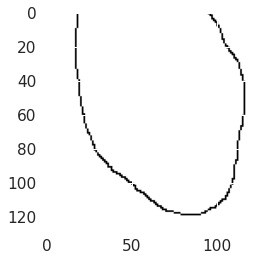

In [ ]:
plt.imshow(x_train[1437], cmap= 'binary')

In [ ]:
x_train = x_train.reshape(x_train.shape[0], size,size, 1)
x_test = x_test.reshape(x_test.shape[0], size,size,1)

In [ ]:
x_train.shape

(4120, 128, 128, 1)

In [ ]:
input_shape= 128,128,1

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('softmax'))

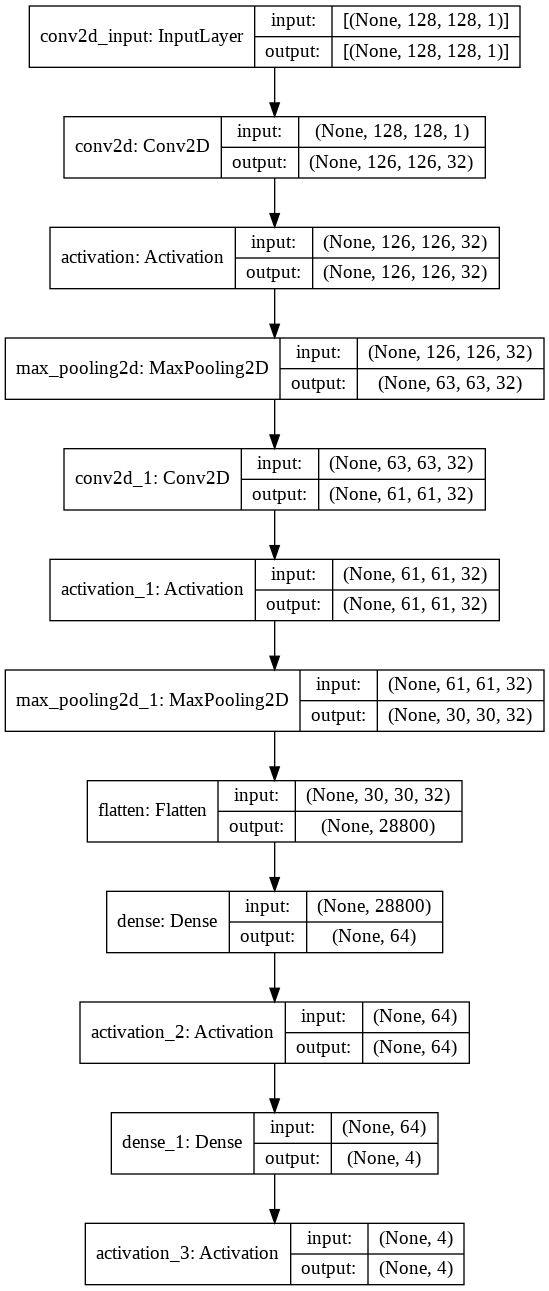

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
activation_20 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_21 (Activation)   (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 28800)            

In [ ]:
#pip install tensorflow-addons       # uncomment and run this, if you got an error in the next cell

In [ ]:
import tensorflow_addons as tfa

# Compile the model
model.compile(optimizer= Adam(lr= 0.0001), 
              loss='categorical_crossentropy', metrics=['accuracy',
              tf.keras.metrics.Precision(thresholds=None),
              tf.keras.metrics.Recall(thresholds=None),
              tfa.metrics.F1Score(num_classes=4),
              tfa.metrics.CohenKappa(num_classes=4)])

# Fit the model for training
history= model.fit(x_train, y_train, batch_size = 64, 
                   validation_data= (x_test, y_test), 
                   epochs = 20)

Epoch 1/20
65/65 [==============================] - 3s 35ms/step - loss: 1.2081 - accuracy: 0.4097 - precision_4: 0.7193 - recall_4: 0.1515 - f1_score: 0.3624 - cohen_kappa: 0.2092 - val_loss: 0.7731 - val_accuracy: 0.7424 - val_precision_4: 0.8203 - val_recall_4: 0.6152 - val_f1_score: 0.7450 - val_cohen_kappa: 0.6565
Epoch 2/20
65/65 [==============================] - 2s 27ms/step - loss: 0.6708 - accuracy: 0.7776 - precision_4: 0.8456 - recall_4: 0.6706 - f1_score: 0.7764 - cohen_kappa: 0.7035 - val_loss: 0.5446 - val_accuracy: 0.7902 - val_precision_4: 0.8425 - val_recall_4: 0.7152 - val_f1_score: 0.7853 - val_cohen_kappa: 0.7203
Epoch 3/20
65/65 [==============================] - 2s 26ms/step - loss: 0.5017 - accuracy: 0.8176 - precision_4: 0.8628 - recall_4: 0.7612 - f1_score: 0.8155 - cohen_kappa: 0.7567 - val_loss: 0.4777 - val_accuracy: 0.8207 - val_precision_4: 0.8466 - val_recall_4: 0.7739 - val_f1_score: 0.8159 - val_cohen_kappa: 0.7609
Epoch 4/20
65/65 [===================

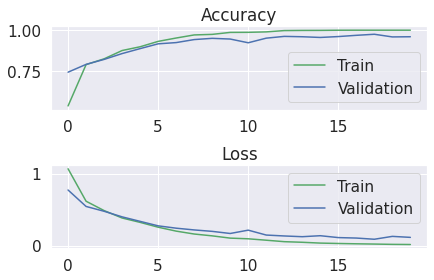


train_accuracy :  [0.5354368686676025, 0.7888349294662476, 0.8242718577384949, 0.8752427101135254, 0.8983009457588196, 0.9313106536865234, 0.951941728591919, 0.9708737730979919, 0.974271833896637, 0.9864077568054199, 0.9868931770324707, 0.9895631074905396, 0.9975728392601013, 0.9985436797142029, 0.9987863898277283, 0.9997572898864746, 1.0, 1.0, 1.0, 1.0]
valid_accuracy :  [0.7423912882804871, 0.790217399597168, 0.820652186870575, 0.856521725654602, 0.886956512928009, 0.916304349899292, 0.9239130616188049, 0.9423912763595581, 0.949999988079071, 0.945652186870575, 0.9228261113166809, 0.9510869383811951, 0.9619565010070801, 0.959782600402832, 0.9554347991943359, 0.960869550704956, 0.968478262424469, 0.9750000238418579, 0.958695650100708, 0.959782600402832]
train_err :  [1.068096399307251, 0.6171656250953674, 0.487161248922348, 0.384008526802063, 0.32320261001586914, 0.25622299313545227, 0.20167656242847443, 0.16139444708824158, 0.13584651052951813, 0.1044386550784111, 0.09494244307279587

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

train_err = history.history["loss"]
valid_err = history.history["val_loss"]


print("train_accuracy : ", train_accuracy)
print("valid_accuracy : ", valid_accuracy)
print("train_err : ", train_err)
print("valid_err : ", valid_err)

In [ ]:
(loss, 
accuracy, 
f1_score, precision, recall,cohen_kappa) = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy = ', (accuracy * 100.0))

29/29 [==============================] - 0s 8ms/step - loss: 0.1148 - accuracy: 0.9598 - precision_4: 0.9597 - recall_4: 0.9587 - f1_score: 0.9599 - cohen_kappa: 0.9464
Accuracy =  95.9782600402832


In [ ]:
y_true =np.argmax(y_test, axis=-1)

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

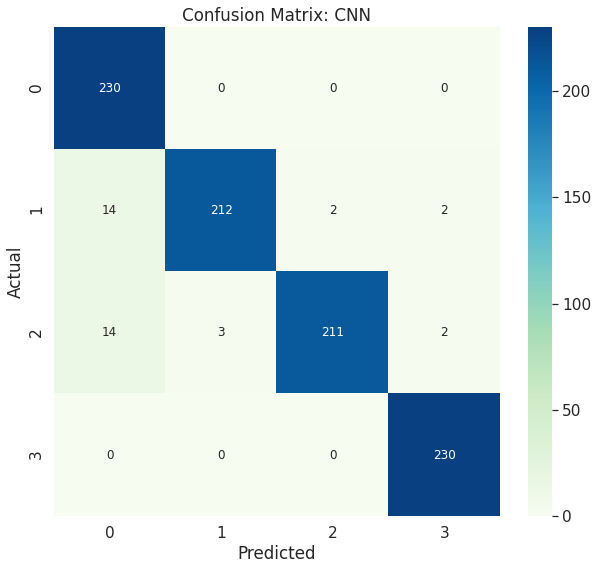

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix: CNN')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="GnBu", annot=True, fmt= 'g', annot_kws={"size": 12})# font size

(128, 128)

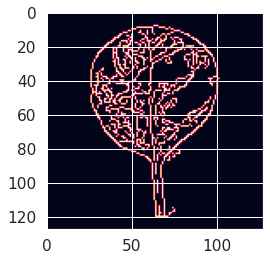

In [ ]:
img = cv2.imread('/content/spinach2.jpg')

img = cv2.resize(img, (size, size ))
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.Canny(img, 10, 200)
#img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
img.shape

In [ ]:
img= img.reshape(1, 128,128,1)
pred = model.predict(img)
output = np.argmax(pred, axis=1)
output     # array[0] = kale, array[1] = lettuce, array[2] = spinach and array[3] = water_spinach